In [2]:
import pandas as pd
import numpy as np

In [3]:
fake = pd.read_csv(r"C:\Users\HP\Downloads\archive\Fake.csv")
real = pd.read_csv(r"C:\Users\HP\Downloads\archive\True.csv")


In [4]:
fake["label"] = 0   # 0 = Fake
real["label"] = 1   # 1 = Real

In [6]:
data = pd.concat([fake, real], ignore_index=True)[["text", "label"]]
print("Data loaded:", data.shape)


Data loaded: (44898, 2)


In [7]:
data.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [12]:

import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

data["cleaned_text"] = data["text"].apply(clean_text)


In [13]:
text = "Breaking News!! India WINS 2023 World Cup!!! 🏆"
print(clean_text(text))


breaking news india wins world cup 


In [14]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data["cleaned_text"])
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
print(vectorizer.get_feature_names_out())


['abadi' 'abandon' 'abandoned' ... 'zones' 'zor' 'zuma']


In [20]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(X_train, y_train)


MultinomialNB()

In [19]:
print("Train Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test))


Train Accuracy: 0.936132301353082
Test Accuracy: 0.9309576837416481


In [22]:

sample = "Government of India launches new scheme for farmers."
cleaned = clean_text(sample)

In [23]:
vector = vectorizer.transform([cleaned])

In [24]:
pred = model.predict(vector)

In [25]:
print("Prediction:", "Real 🟢" if pred[0]==1 else "Fake 🔴")

Prediction: Real 🟢


In [40]:
vectorizer.get_feature_names_out()


array(['abadi', 'abandon', 'abandoned', ..., 'zones', 'zor', 'zuma'],
      dtype=object)

In [27]:
def predict_news(news):
    vec = vectorizer.transform([clean_text(news)])
    return "Real 🟢" if model.predict(vec)[0] else "Fake 🔴"

print(predict_news("Government launches new education scheme"))
print(predict_news("Aliens spotted in Delhi sky"))


Real 🟢
Fake 🔴


In [28]:
print(data['label'].value_counts())


label
0    23481
1    21417
Name: count, dtype: int64


In [29]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, model.predict(X_test)))
print(classification_report(y_test, model.predict(X_test)))


[[4450  283]
 [ 337 3910]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      4733
           1       0.93      0.92      0.93      4247

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



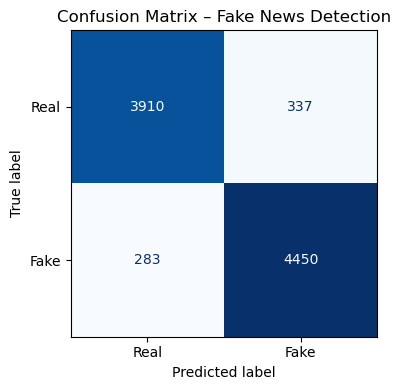

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on test set
y_pred = model.predict(X_test)

# Create and display confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real', 'Fake'])

fig, ax = plt.subplots(figsize=(4, 4))
disp.plot(ax=ax, cmap="Blues", colorbar=False)
ax.set_title("Confusion Matrix – Fake News Detection")
plt.tight_layout()



